In [1]:
import os
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [2]:
path, dirs, imgs = next(os.walk("/home/fakerpbc/data/imagecaption/Flickr8k_Dataset/train/"))
imgs_count = len(imgs)
print("Number images: %d" % imgs_count)

Number images: 7


In [3]:
IMG_PATH="/home/fakerpbc/data/imagecaption/Flickr8k_Dataset/train/"

Fist image: 2513260012_03d33305cf.jpg


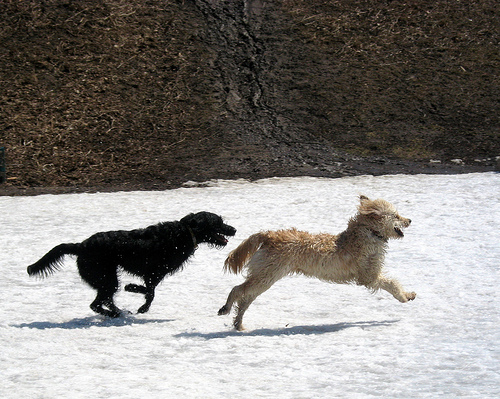

In [4]:
from keras.preprocessing.image import load_img
print("Fist image: %s" % imgs[0])
image = load_img(IMG_PATH + imgs[0])
image

In [5]:
from keras.preprocessing.image import img_to_array
image = img_to_array(image)
image.shape

(399, 500, 3)

In [6]:
from keras.applications.vgg16 import preprocess_input
# reshape data into a single sample of an image
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
image.shape

(1, 399, 500, 3)

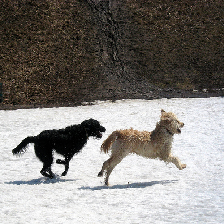

In [7]:
image = load_img(IMG_PATH+imgs[0], target_size=(224, 224))
image

In [ ]:
from os import listdir
# extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    print(model.summary())
    # extract features from each photo
    features = dict()
    for name in listdir(directory):
        # load an image from file
        filename = directory + '/' + name
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the VGG model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

# extract features from all images
directory = '/home/fakerpbc/data/imagecaption/Flickr8k_Dataset/train/'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features.pkl', 'wb'))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 1189s 2us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
________